# Marketability of Airbnb - Group ID: 98

# Introduction

#### Project Description
This project aims to highlight the impact of geographical location upon the overall marketability of
Airbnb listings. The goal of the project is to obtain a good understanding of which airbnb locations in New York City are the bussiest and the factors contributing to this.

Group ID: 98

Group member(s): Muhammad Ammad Zohair

#### Data sets used
In this project, three distinct data sets, all related to New York City, are used to deeply study the airbnb listings and thier relitive locations, prices, availability e.t.c. The objective is to obtain patterns in the data and extract insights.


*   [Airbnb listings and metrices in NYC, NY, USA (2019)](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) : This data set contains all the information pertaining to the airbnb listings in NYC. It consists of 16 coloumns including price, availability ,reviwes per month, among others. It contains more than 47000 unique listings.
*   [New York City Population by Borough, 1950 - 2040](https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9) : The data set consists of coloumns which give the population density share of the different neighbourhood groups of NYC from 1950 to 2040. We will only use the coloumn pertaining to the year 2020 in this project.
*   [NYC subway stations](https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49) : The data set includes the geographical coordinates of the subway stations of NYC.








### DataFrame

The data will be imported and the dataframe created to begin data analysis.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# to be used a prefix for file I/O
path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join

%matplotlib inline

In [ ]:
airbnb = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, airbnb))
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data pre-processing


### Understaing the Data
We will check the data type of each couloumn to obtain a better understanding of the data.

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

The next step is to determine whether the data contains any Nan values so we perform a check for the percentage of NaN values in each coloumn of the dataframe.

In [ ]:
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### Cleaning the Data
The 'name', 'host_name', 'last_review', and 'reviews_per_month' coloumns contain NaN values. We will noew drop all the NaN values from the dataframe so we have clean data to work on.

In [ ]:
df = df.dropna(subset=["name","host_name","last_review","reviews_per_month"])

df.isnull().sum() / df.shape[0]

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

We can examine that all NaN values have been dropped and the dataframe is ready to work with.


# Visualizing the Data


### Correlation between population density and number of listings
The first step is to determine the number of listings with respect to each neighbourhood group in NYC.

Text(0, 0.5, 'No. of listings')

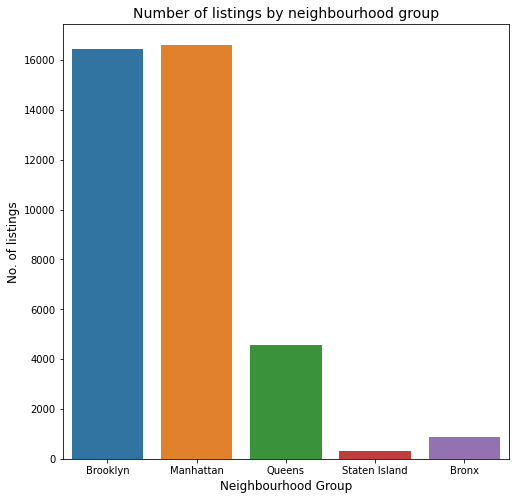

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df["neighbourhood_group"]) 
ax.set_title('Number of listings by neighbourhood group', fontsize=14)
ax.set_xlabel('Neighbourhood Group', fontsize=12)
ax.set_ylabel('No. of listings', fontsize=12)

We now know that the majority of share of airbnb listings in NYC is credited to the neighbourhoods of Brooklyn and Manhattan. The NYC population by borough data set will be imported and checks will be made for the population density and compared to the number of listings per neighbourhood area to find a correlation which may offer further insights, such as tourists choosing to stay away from the bustle of the city, meaning that there would be high number of listings in places with lower population density.

In [ ]:
population_df = pd.read_csv(join(path_prefix, "New_York_City_Population_by_Borough__1950_-_2040.csv"))

Text(0.5, 1.0, 'Population density')

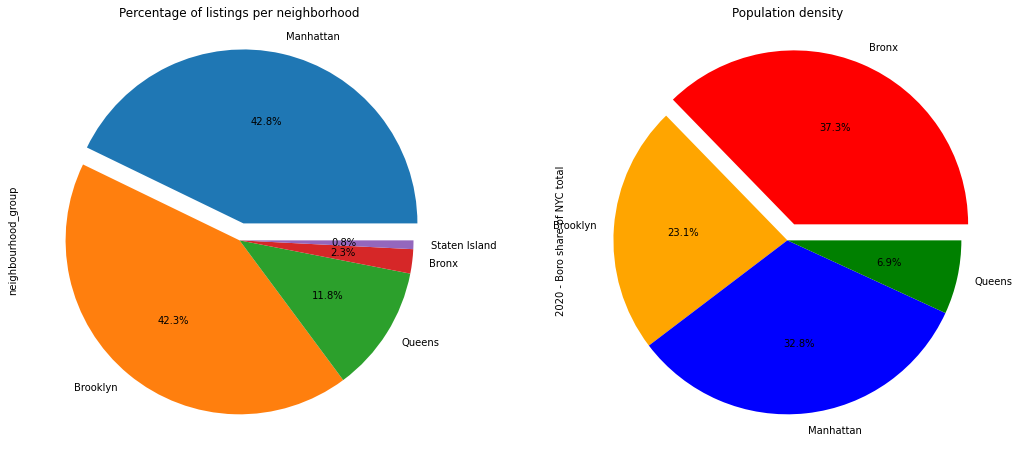

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Percentage of listings per neighborhood')
population_df['2020 - Boro share of NYC total'].tail(4).plot.pie(explode=[0.1,0,0,0],labels=('Bronx','Brooklyn','Manhattan','Queens'),colors=['red','orange','blue','green'],autopct='%1.1f%%',ax=ax[1])

ax[1].set_title('Population density')

The results do not provide us with a fixed pattern or any direct or indirect correlations. Therefore, we proceed to analyze the data in more ways.

### Availability of room(s)
We will now check for the number of days on average that rooms are availaible in each neighbourhood group.


Text(0, 0.5, 'Days')

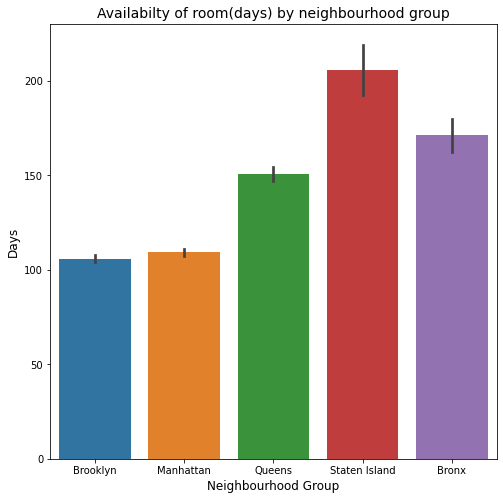

In [ ]:
fig,ax1=plt.subplots(1,1, figsize=(8,8) )
                       
sns.barplot(x='neighbourhood_group', y='availability_365', data=df, ax=ax1)

ax1.set_title('Availabilty of room(days) by neighbourhood group', fontsize=14)
ax1.set_xlabel('Neighbourhood Group', fontsize=12)
ax1.set_ylabel('Days', fontsize=12)

Although a bar chart serves the purpouse, a better way to visualize these results would be to utilize a boxplot.

Text(0, 0.5, 'Days')

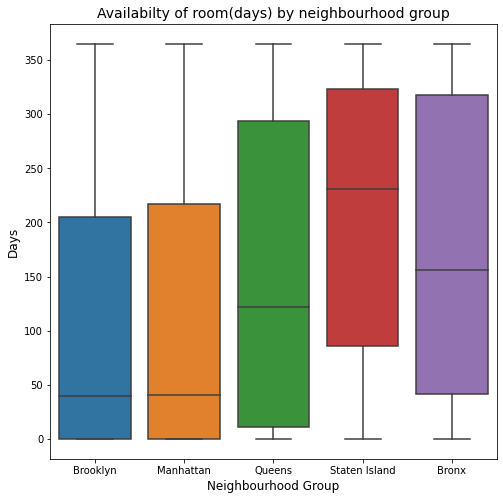

In [ ]:
plt.figure(figsize=(8,8))
ax2 = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')

ax2.set_title('Availabilty of room(days) by neighbourhood group', fontsize=14)
ax2.set_xlabel('Neighbourhood Group', fontsize=12)
ax2.set_ylabel('Days', fontsize=12)

In the previous section we noted that Brooklyn and Manhattan contribute to the lions share of listings in NYC. However, the boxplot reveals that the neighbourhood groups with the most number of listings have the least rooms available on average and vice versa.

### Categorizing based on price and number of reviews

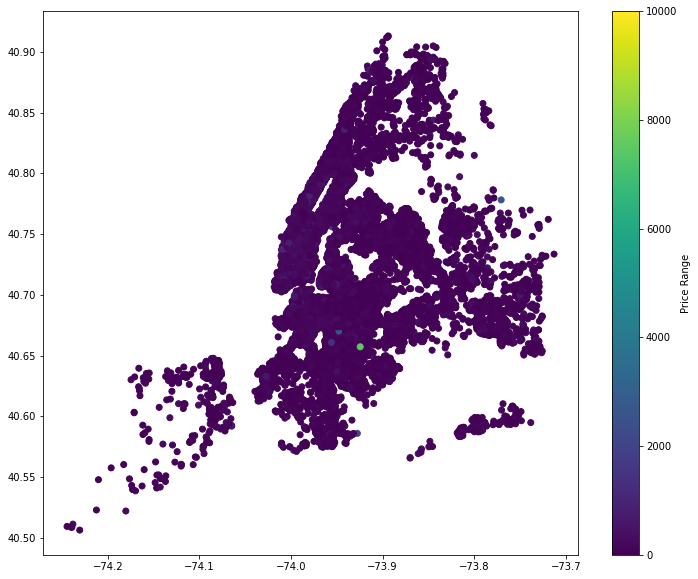

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(df.longitude, df.latitude, c=df.price)

cbar = plt.colorbar()
cbar.set_label('Price Range')

The price variation is not too large to be analyzed seperately when considering the data set as a whole. Therefore we assume that the prices are largely similar; a few exceptions of higher prices can be noticed in the Manhattan and Brooklyn neighbourhood areas.

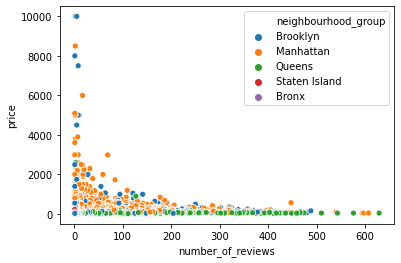

In [ ]:
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group')

Once again, not much can be determined from the data set as a whole as it is too varied. We can further branch the comparison in view of which room types offered are more popular based on prices and number of reviews.

<Figure size 720x432 with 0 Axes>

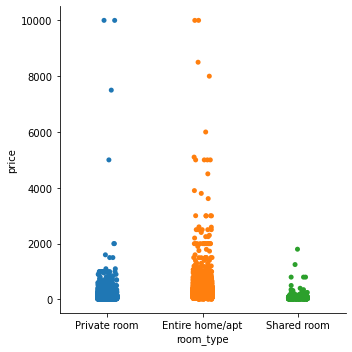

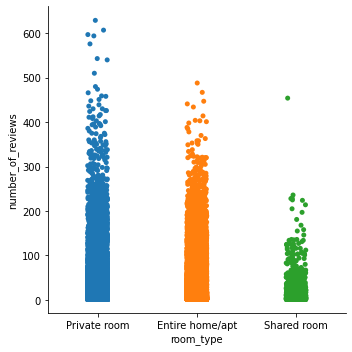

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(x="room_type", y="price", data=df)
sns.catplot(x="room_type", y="number_of_reviews", data=df)

Prices of room types vary as could be expected, with apartments being the costliest while shared rooms having lower price tags in general. Private rooms get most number of reviews;therefore; they are the most popular shortly followed by apartments. Shared rooms are relatively less popular among airbnb customers in NYC.

#### Analyzing the top 15 neighbouhoods
Another factor in deciding the popularity of individual neighbourhoods is to determine which of them have the greatest number of listings. The results may provide a vague idea and can also be furhter utilized to determine the room types which are in greater demand. Although not perfect, these evaluations do provide a very good estimation that can be extended and used to explain trends in the whole dataset.


In [ ]:
popular_neighbourhood=df.neighbourhood.value_counts()
popular_neighbourhood.head(15)

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
East Village          1489
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
East Harlem            943
Greenpoint             866
Chelsea                827
Lower East Side        738
Washington Heights     721
Name: neighbourhood, dtype: int64

In [ ]:
top_reviews = df.groupby(['neighbourhood'])['number_of_reviews'].mean().reset_index()
top_reviews = top_reviews.sort_values('number_of_reviews', ascending=False).reset_index(drop=True)
top_reviews.head(15)

,neighbourhood,number_of_reviews
0,Silver Lake,118.500000
1,Eltingville,114.000000
2,East Elmhurst,88.345029
3,Mount Eden,84.000000
4,Richmondtown,79.000000
5,Springfield Gardens,73.412500
6,Tompkinsville,60.000000
7,Castle Hill,59.000000
8,Highbridge,58.227273
9,Manhattan Beach,57.857143


In [ ]:
mean=df.reviews_per_month.mean()

top_price = df.groupby(['neighbourhood'])['price'].mean().reset_index()
top_price = top_price.sort_values('price', ascending=True).reset_index(drop=True)
top_price.head(15)

,neighbourhood,price
0,New Dorp Beach,38.000000
1,Little Neck,42.333333
2,Bull's Head,48.000000
3,Tremont,49.900000
4,Hunts Point,51.812500
5,Bronxdale,51.875000
6,Soundview,52.846154
7,Olinville,53.000000
8,Corona,56.932203
9,Van Nest,58.555556


We can see that the correlation is very dificult to figure out between different factors. The neighbourhoods with the greaest number of listings and the lowest average prices do not get the greatest number of reviews. Simialarly, neighbourhoods with the lowest prices and the highest number of reviews fail to generate a greater number of listings.

# Locating patterns with map visualization
The following is a map of NYC with each neighbourhood group labelled:


![displaying images](https://greatruns.com/wp-content/uploads/2016/11/nyc-borough-map-1-700x400.png)


We make use of folium to display a similar map with different colours denoting airbnb locations in different neighbourhood groups

In [ ]:
import folium
lat = df["latitude"].mean()
lng = df["longitude"].mean()
m = folium.Map(location=[lat, lng], zoom_start=11, tiles = "Stamen Terrain")

manhattan = df[df["neighbourhood_group"].astype(str) == "Manhattan"][["latitude", "longitude"]].values
brooklyn = df[df["neighbourhood_group"].astype(str) == "Brooklyn"][["latitude", "longitude"]].values
queens = df[df["neighbourhood_group"].astype(str) == "Queens"][["latitude", "longitude"]].values
s_island = df[df["neighbourhood_group"].astype(str) == "Staten Island"][["latitude", "longitude"]].values
bronx = df[df["neighbourhood_group"].astype(str) == "Bronx"][["latitude", "longitude"]].values

for i in manhattan:
  folium.CircleMarker(location=i, radius=0.5, color="black").add_to(m)
for i in brooklyn:
  folium.CircleMarker(location=i, radius=0.5, color="blue").add_to(m)
for i in queens:
  folium.CircleMarker(location=i, radius=0.5, color="red").add_to(m)
for i in s_island:
  folium.CircleMarker(location=i, radius=0.5, color="yellow").add_to(m)
for i in bronx:
  folium.CircleMarker(location=i, radius=0.5, color="purple").add_to(m)

m

We can utlize the number of reviews to judge the popularity of a listing as the number of reviews depict the traffic around these listings; how often customers go there is directly related to how often the listing recieves reviews. However, it should be noted that these could be negative reviews aswell, adversely affecting the listing's popularity. Since we have no method of determining the nature of the reviews, all are considered positive.

First, we will take the mean of reviews per-month than add 2 standard deviations to it inorder to obtain a high benchmark to compare against.

We are using reviews per-month so we get overall popularity of the lisings throughout the year, rathar than seasonal.

In [ ]:
data = df.reviews_per_month

def fmean(data):
  s = 0
  for observation in data:
    s += observation
  return s/len(data)
mean=fmean(data)

def fvar(data):
  mean=fmean(data)
  s = 0
  for observation in data:
    s += (observation-mean)**2
  return s/len(data)
def fstd(data):
  var = fvar(data)
  return np.sqrt(var)

variance = fvar(data)
S=fstd(data)

compare=2*S + mean 

m = folium.Map(location=[lat, lng], zoom_start=11, tiles = "Stamen Terrain")
#df['reviews_per_month'] = df['reviews_per_month'].fillna(0).astype(int)

map = df[df["reviews_per_month"].astype(int) >= compare][["latitude", "longitude"]].values

for i in map:
  folium.CircleMarker(location=i, radius=1, color="black").add_to(m)

m

We understand now that the bussiest locations in NYC with regards to airbnb traffic (base on number of reviews) are Manhattan followed closely by Brooklyn. Other neighbourhood groups pale in comparison.

# Machine learning

Since we removed the NaN values before we will now remove the outliers from the price coloumn to produce a fairer result from ML models. We aaume that the data in the the top and lower 5% are outliers so we drop the outlier rows utilizing these percentiles.

In [ ]:
upper_lim = df['price'].quantile(.95)
lower_lim = df['price'].quantile(.05)
 
df = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm= LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
r2_score(y_test,y_pred)


0.38736070009800627

We are using linear regression model and the accuracy we got is 38.7%.Our model is predicting that how price is varying in NYC depending on different features provided in the dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lm= LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
r2_score(y_test,y_pred)

0.3932301392533969

If we vary the data partitioning by assigning 30% of the data for testing, our accuracy increases from 38.7% to 39.3% (which cannot be considered as a large change for sacrificing 10% of training data)

In [ ]:
features = [ "minimum_nights" , "reviews_per_month" , "availability_365"]
X = df[features].values  
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()  
model.fit(X_train, y_train)

coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])  
coeff_df


,Coefficient
minimum_nights,0.059795
reviews_per_month,-1.665370
availability_365,0.002170


Now we convert the features and label into coloumn vectors. We can alanlyze that minimum nights, and availability of rooms have a positive relation with price i.e increase in one corresponds to an increase in the other. Similarly reviews per moth has an inverse relation with price. This can be inferred as busy places being more busy due to thier cheap price and in turn recieving more reviews due to thier popularity. Now we will try various regressions model to determine which one works best with the data.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

knn = KNeighborsRegressor(2)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=50)

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

def print_f(mse,mae,rmse):

  print("mse: {}".format(mse))
  print("mae: {}".format(mae))
  print("rmse: {}".format(rmse))

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print_f(mse,mae,rmse)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print_f(mse,mae,rmse)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print_f(mse,mae,rmse)



mse: 35774.44405042999
mae: 85.02541157841065
rmse: 189.14133353244074
mse: 50355.35583989284
mae: 99.63918431996684
rmse: 224.39999073059883
mse: 87549.70412105603
mae: 102.78712169993561
rmse: 295.8879925259828


Performance of the regressor models is pathetic as they are outputing  very large errors. Other ML models should be explored inorder to draw some meaningful insights.

In [ ]:
df["room_type"]= pd.get_dummies(df['room_type'])

X = df.drop('room_type', axis=1) 
y = df['room_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

model = tree.DecisionTreeClassifier() 
accuracies = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy= %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy= 0.78 (+/- 0.01)


We now build a decision tree on room-types and utilize cross-validation with cv set to 5 inorder to obtain the accuracy of our model. We get a high accuracy of 78% from this model.

## Results

Both decision tree and regression models have been applied to the dataset. The regression models were applied to the price coloumn with features being 'minimum nights' , 'reviews per month' , and 'availability' coloumns. The decision tree, in comparison, was applied to the room-types coloumn as it was inevitable that price would again provide a very low accuracy percentage. It gave an accuracy of 78% (+/-0.01).
The errors obtained in regression models:

|Error Function|Knn regressor|Dt regressor|Rf regrssor|
|--------------|------------|-------------|-----------|
|mse           | 87549      |50355        |35774      |
|mae           |  103       | 99          | 85        |
|rmae          |     296    | 224         | 189       |



# Conclusion

Overall, I beleive that this notebook offers various intersting insights and reveals intiuitive relationships among different factors owing to the price and marketability of airbnb listings in New York. The findings provide more general information rathar than any solid correlations and no determining factors could be obtained with a high accuracy, that do effect prices of listings. All evaluations and analysis have also been provided throught the notebook. As the dataset is quiet varied and has an abundance of data, some of which is not of much use, efforts were not made to pinpoint single factors but to investigate the complete dataset and draw out a large number of relationships among differing factors. Although many factors come into play simultaneously, I have tried to uncover numerous different angles of evaluating the dataset and also used additional datasets. I believe that the findings of this project can also be applied to other metropolitan cities, although we should be skeptical when extending them to airbnb locations in tourist destinations. The ML models used need to be further polished and tuned to increase accuacy. Other models should also be applied and visualised as accuracy is a preferance in such data analysis. Furthermore, another objective of the project which remained uncomplete was to make use of the adittional data set 'NYC subway staions' to determine whether customer prefrences shift with geography, that is, does proximity to a subway station influence a customer's decision in prefering some airbnb listings over others. This may be a good way of factoring in significance of location among the consumers and improving prediction performance and will surely be considered in the future.